In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
RESHAPED = 784

In [7]:
X_train  = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
X_train /= 255
X_test /= 255

In [10]:
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [11]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical (Y_test, 10)

In [12]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()

In [13]:
model_0.add(Flatten())

In [14]:
model_0.add(Dense(128,input_shape=(784,), name='dense_layer1', activation='relu'))
model_0.add(Dense(64,input_shape=(784,), name='dense_layer2', activation='relu'))

In [15]:
model_0.add(Dense(10,input_shape=(784,), name='dense_layer3', activation='softmax'))

In [16]:
model_0.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
training=model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 5s 4ms/step - loss: 0.9587 - accuracy: 0.6923 - val_loss: 0.6496 - val_accuracy: 0.7837
Epoch 2/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5891 - accuracy: 0.7967 - val_loss: 0.5535 - val_accuracy: 0.8043
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5199 - accuracy: 0.8199 - val_loss: 0.5055 - val_accuracy: 0.8213
Epoch 4/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4859 - accuracy: 0.8304 - val_loss: 0.4760 - val_accuracy: 0.8317
Epoch 5/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4631 - accuracy: 0.8375 - val_loss: 0.4630 - val_accuracy: 0.8370
Epoch 6/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4445 - accuracy: 0.8453 - val_loss: 0.4527 - val_accuracy: 0.8428
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4316 - accuracy: 0.8482 - val_loss: 0.4570 - val_accuracy: 0.8368
Epoch 

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


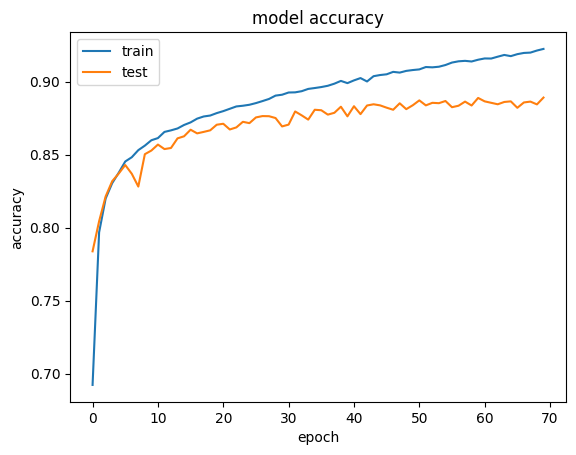

In [19]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

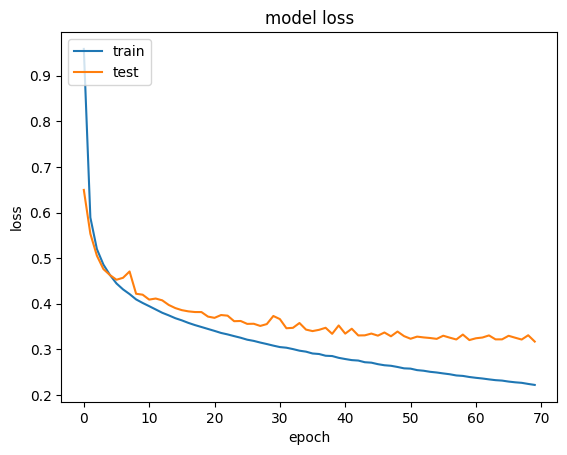

In [20]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8810
Test accuracy: 0.8809999823570251


In [22]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_layer1 (Dense)        (None, 128)               100480    
                                                                 
 dense_layer2 (Dense)        (None, 64)                8256      
                                                                 
 dense_layer3 (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
from tensorflow.keras.layers import Dropout

model_2 = tf.keras.Sequential()
N_hidden = 128

In [24]:
model_2.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu' ))
model_2.add(Dropout (0.3))

In [25]:
model_2.add(Dense (64, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

In [26]:
model_2.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [27]:
model_2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 4ms/step - loss: 1.3231 - accuracy: 0.5447 - val_loss: 0.7687 - val_accuracy: 0.7215
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.8610 - accuracy: 0.6964 - val_loss: 0.6402 - val_accuracy: 0.7752
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.7362 - accuracy: 0.7429 - val_loss: 0.5724 - val_accuracy: 0.8048
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6680 - accuracy: 0.7672 - val_loss: 0.5323 - val_accuracy: 0.8132
Epoch 5/50
750/750 [==============================] - 3s 3ms/step - loss: 0.6253 - accuracy: 0.7832 - val_loss: 0.5063 - val_accuracy: 0.8221
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.5891 - accuracy: 0.7931 - val_loss: 0.4856 - val_accuracy: 0.8277
Epoch 7/50
750/750 [==============================] - 3s 3ms/step - loss: 0.5682 - accuracy: 0.8023 - val_loss: 0.4707 - val_accuracy: 0.8309
Epoch 

In [29]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


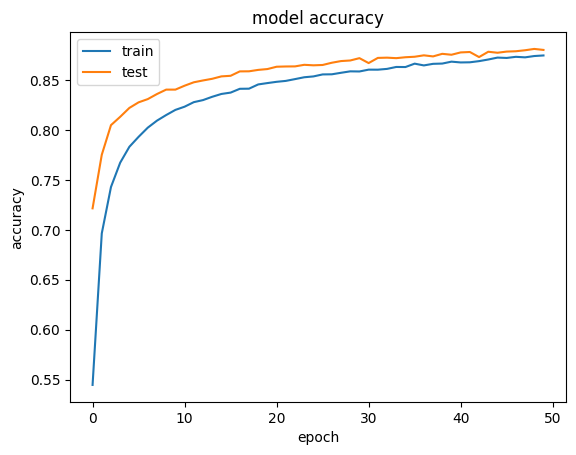

In [30]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

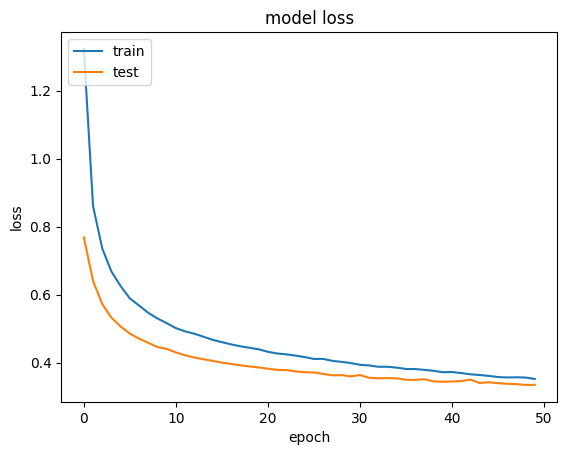

In [31]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model_2.weights[0]

<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[ 0.0793657 , -0.06940009,  0.00803867, ...,  0.00524201,
        -0.07270835, -0.02701195],
       [ 0.07320512, -0.01821671, -0.00385211, ..., -0.05861746,
         0.07753252,  0.07913241],
       [-0.04153242, -0.02738059, -0.02450354, ..., -0.03214201,
        -0.0359263 ,  0.01196245],
       ...,
       [ 0.06904264, -0.06438813,  0.05005557, ..., -0.06884333,
        -0.0106047 , -0.01587436],
       [ 0.02330174,  0.03898092, -0.03598616, ...,  0.03848194,
        -0.01658778,  0.01583169],
       [ 0.07141334, -0.0399258 , -0.03545928, ..., -0.00653116,
        -0.03657798,  0.0485043 ]], dtype=float32)>

In [33]:
test_loss, test_acc  = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8704
Test accuracy: 0.8704000115394592


In [34]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.0793657 , -0.06940009,  0.00803867, ...,  0.00524201,
         -0.07270835, -0.02701195],
        [ 0.07320512, -0.01821671, -0.00385211, ..., -0.05861746,
          0.07753252,  0.07913241],
        [-0.04153242, -0.02738059, -0.02450354, ..., -0.03214201,
         -0.0359263 ,  0.01196245],
        ...,
        [ 0.06904264, -0.06438813,  0.05005557, ..., -0.06884333,
         -0.0106047 , -0.01587436],
        [ 0.02330174,  0.03898092, -0.03598616, ...,  0.03848194,
         -0.01658778,  0.01583169],
        [ 0.07141334, -0.0399258 , -0.03545928, ..., -0.00653116,
         -0.03657798,  0.0485043 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-6.81029707e-02,  2.58183461e-02,  3.57298069e-02, -1.34347126e-01,
        -1.39180467e-01,  1.43997133e-01, -9.37444642e-02,  1.49092197e-01,
        -2.43441418e-01,  5.37868403e-02,  2.70102043e-02, 

In [36]:
model_3 = tf.keras.Sequential()
N_hidden = 64

In [37]:
model_3.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

In [38]:
model_3.add(Dropout(0.3))

In [39]:
model_3.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))

In [40]:
model_3.add(Dropout(0.3))

In [41]:
model_3.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [42]:
model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.8397 - accuracy: 0.6980 - val_loss: 0.4788 - val_accuracy: 0.8292
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.8070 - val_loss: 0.4180 - val_accuracy: 0.8474
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4862 - accuracy: 0.8274 - val_loss: 0.4019 - val_accuracy: 0.8532
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4540 - accuracy: 0.8372 - val_loss: 0.3843 - val_accuracy: 0.8597
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4363 - accuracy: 0.8440 - val_loss: 0.3731 - val_accuracy: 0.8637
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8497 - val_loss: 0.3665 - val_accuracy: 0.8635
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4080 - accuracy: 0.8541 - val_loss: 0.3619 - val_accuracy: 0.8680
Epoch 

In [44]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


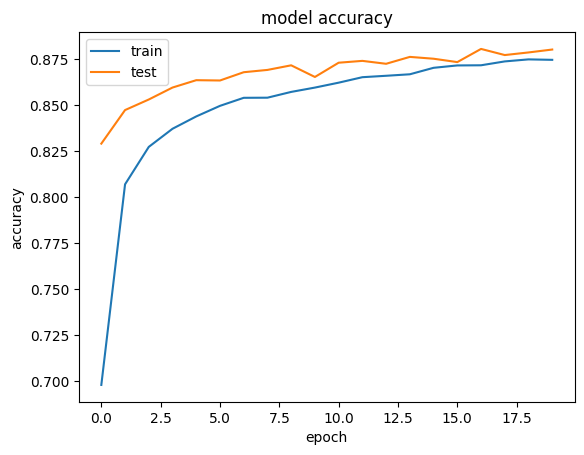

In [45]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

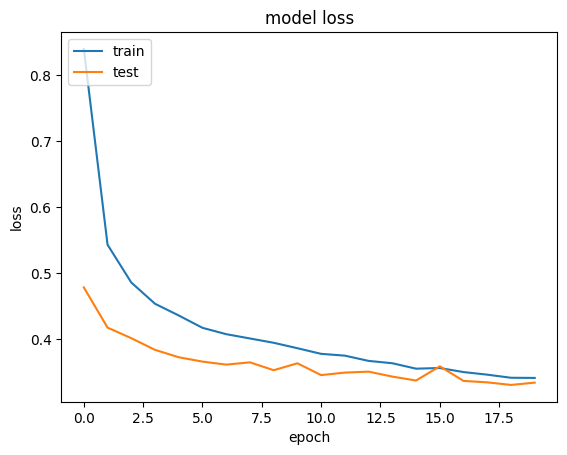

In [46]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8701
Test accuracy: 0.8701000213623047


In [48]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.0749584 , -0.04285758, -0.00621858, ...,  0.24592194,
          0.12954664, -0.10116126],
        [-0.09468042,  0.13722448,  0.07368165, ...,  0.1262793 ,
          0.20498174, -0.23873813],
        [-0.08912803,  0.0031902 , -0.27949739, ...,  0.10579983,
          0.32707697, -0.3058903 ],
        ...,
        [-0.1134865 ,  0.11236584,  0.02093311, ...,  0.13232343,
         -0.01035345, -0.09513487],
        [ 0.06888407,  0.18883261, -0.05828755, ...,  0.2139429 ,
          0.1904444 , -0.11932016],
        [-0.08502714,  0.10933539, -0.07035857, ...,  0.24466757,
          0.3924194 , -0.23248857]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.07098998, -0.06973596,  0.02030686, -0.1630641 , -0.26013646,
         0.10382379,  0.13301256,  0.01892889, -0.27449042, -0.18796732,
        -0.33441046, -0.30043247,  0.35992557,  0.27036074, -0.2250

In [50]:
model_4 = tf.keras.Sequential()
N_hidden = 512

In [51]:
model_4.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

In [52]:
model_4.add(Dropout (0.3))

In [53]:
model_4.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))

In [54]:
model_4.add(Dropout (0.3))

In [55]:
model_4.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [56]:
model_4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)

Epoch 1/31
375/375 [==============================] - 3s 4ms/step - loss: 0.5643 - accuracy: 0.7972 - val_loss: 0.4021 - val_accuracy: 0.8543
Epoch 2/31
375/375 [==============================] - 1s 4ms/step - loss: 0.4139 - accuracy: 0.8472 - val_loss: 0.3667 - val_accuracy: 0.8652
Epoch 3/31
375/375 [==============================] - 1s 4ms/step - loss: 0.3748 - accuracy: 0.8645 - val_loss: 0.3503 - val_accuracy: 0.8717
Epoch 4/31
375/375 [==============================] - 1s 4ms/step - loss: 0.3509 - accuracy: 0.8701 - val_loss: 0.3395 - val_accuracy: 0.8787
Epoch 5/31
375/375 [==============================] - 2s 5ms/step - loss: 0.3379 - accuracy: 0.8735 - val_loss: 0.3326 - val_accuracy: 0.8789
Epoch 6/31
375/375 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8796 - val_loss: 0.3249 - val_accuracy: 0.8807
Epoch 7/31
375/375 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8827 - val_loss: 0.3222 - val_accuracy: 0.8808
Epoch 

In [58]:
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8942
Test accuracy: 0.8942000269889832


In [59]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


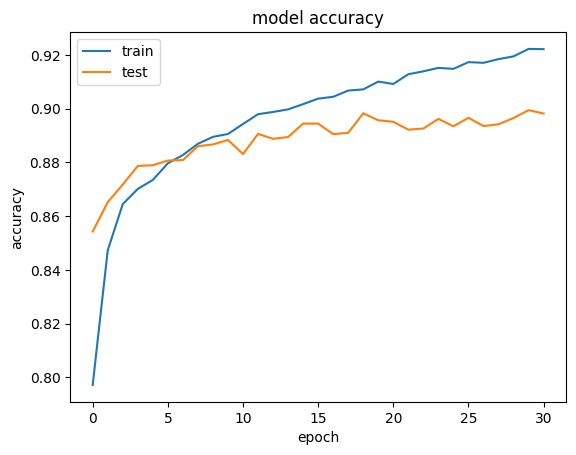

In [60]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

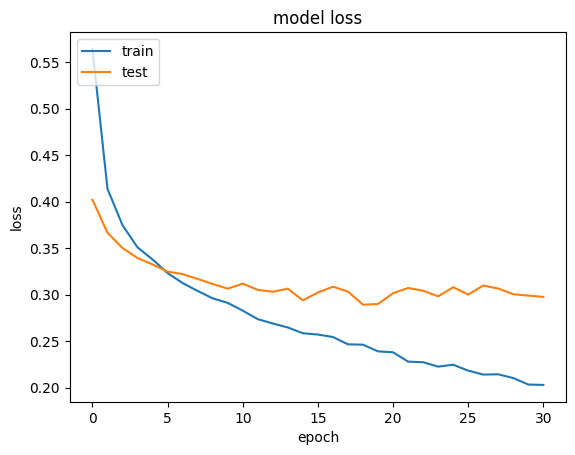

In [61]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.06761179, -0.01369043, -0.02084748, ..., -0.04734832,
          0.43986872, -0.01546346],
        [ 0.09338883, -0.0120727 , -0.04564986, ..., -0.01524515,
          0.04807284, -0.04818394],
        [-0.02101013,  0.03607135,  0.07344505, ..., -0.09997189,
          0.21110435, -0.13088678],
        ...,
        [ 0.09727184, -0.02745028, -0.07293144, ...,  0.22995892,
         -0.02107357,  0.01511086],
        [ 0.07257647, -0.00486907,  0.01076946, ...,  0.37366495,
          0.17753892,  0.06580952],
        [ 0.24219958, -0.02489896,  0.04177152, ..., -0.1723516 ,
          0.28273353,  0.0361942 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.05236425,  0.04242064, -0.0179019 ,  0.05870083,  0.03359399,
         0.0087629 ,  0.07403052, -0.01131052, -0.03522375, -0.08582604,
         0.25642243,  0.25784564, -0.25390846,  0.09847073, -0.01